# Identify Characteristic Values for the Spring Mass System - Grid Search

In technical applications, several parameters typically need to be identified and the parameters interact in relation to the simulation result. The Grid Search method evaluates the simulation results for each given parameter combination, arranging the combinations in a grid. The parameter combination with the best score is used to simulate the system behavior and the best result is plotted in the given time span. 

In this experimet, the measured data as plotted first.

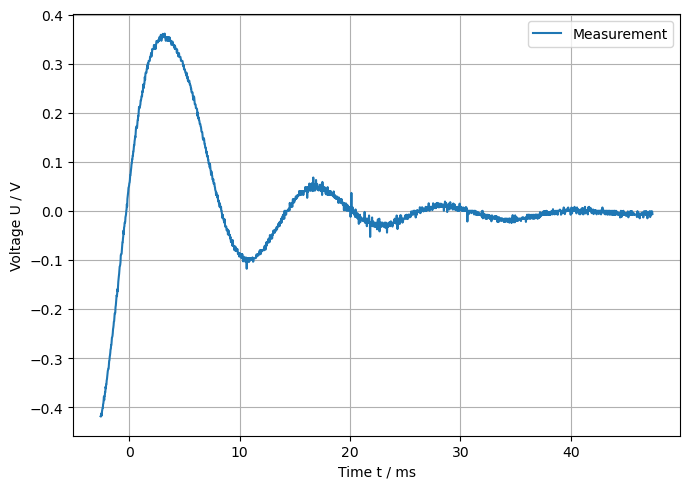

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and format data
signal = pd.read_csv('scope_1.csv', header=1)
signal['time'] = signal['second']*1000
signal = signal.drop(['second'], axis=1)
signal = signal.rename(columns={'Volt': 'measurement'})

# Plot signals
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal['time'], signal['measurement'], label='Measurement')
ax1.set_xlabel(r'Time t / ms')
ax1.set_ylabel(r'Voltage U / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

The measured signal is compared with a simulated signal based on mathematical description

$x\left( t \right) = A_0 \cdot {e^{{\delta _0} \cdot \left( {t - {t_0}} \right)}} \cdot \cos \left( {\frac{{2 \cdot \pi }}{{{T_0}}} \cdot \left( {t - {t_0}} \right)} \right) \cdot \sigma \left( {t - {t_0}} \right)$

In order to evaluate the simulation with the experiment, the RMS value is defined as cost function. It determines the RMS value for any given parameter combination with the name grid.

In [2]:
def cost_function(grid):
    A, T, t, d = grid
    time, measurement = (signal.loc[signal.time > 5, ['time', 'measurement']].values.T)
    N = measurement.shape
    simulation = A * (np.exp(d*(time - t)) * np.cos(2*np.pi/T*(time - t))) * (time > 0)
    cost = np.sqrt(((simulation - measurement)**2).sum() / N)
    return cost

For each parameter a vector of values is defined. The brute function determines the cost function for every permutation of parameter values. The fmin argument finds an optimum with inter digital precision by interpolation.

RMS score: 0.0078


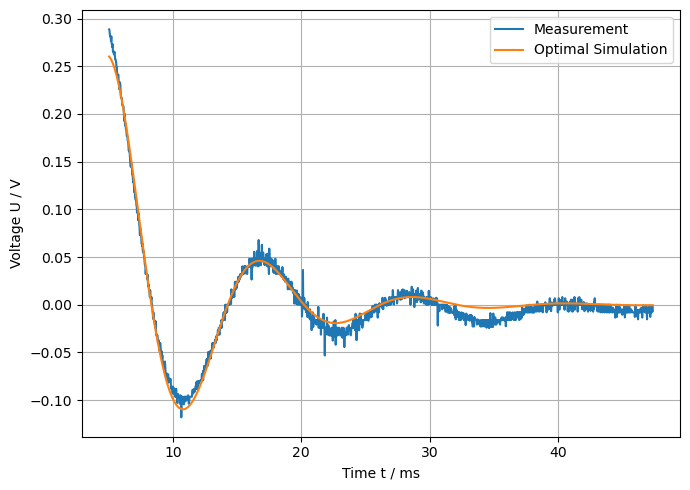

In [3]:
from scipy.optimize import brute, fmin

# Parameters ranges
grid = (slice(2.3, 2.7, 0.1), slice(17, 19, 0.5), slice(3, 7, 0.5), slice(-0.04, -0.01, 0.01))

# Run optimization
resbrute = brute(cost_function, grid, full_output=True, finish=fmin)

# Decode optimization result, best parameters are stored in resbrute[0]
A_0, T_0, t_0, d_0 = resbrute[0]

# Generate signal with best parameter
signal['simulation'] = A_0 * (np.exp(d_0*(signal['time']-t_0)) * np.cos(2*np.pi/T_0*(signal['time']-t_0))) * (signal['time'] > 0)

# Plot signals
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal.loc[signal.time > 5, 'time'], signal.loc[signal.time > 5, 'measurement'], label='Measurement')
ax1.plot(signal.loc[signal.time > 5, 'time'], signal.loc[signal.time > 5, 'simulation'], label='Optimal Simulation')
ax1.set_xlabel(r'Time t / ms')
ax1.set_ylabel(r'Voltage U / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

# rms score with the best parameters
print(f'RMS score: {resbrute[1].round(4)}')
